In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount)<1: drive.mount('/content/drive')


In [3]:
# fork 생략
!git clone https://github.com/anishathalye/neural-style.git
%cd neural-style


fatal: destination path 'neural-style' already exists and is not an empty directory.
/content/neural-style


In [4]:
!wget http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
!ls *.mat  

--2020-12-11 04:08:08--  http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Resolving www.vlfeat.org (www.vlfeat.org)... 64.90.48.57
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat [following]
--2020-12-11 04:08:08--  https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534904783 (510M)
Saving to: ‘imagenet-vgg-verydeep-19.mat’

imagenet-vgg-veryde 100%[===================>] 510.12M  35.1MB/s    in 15s     

2020-12-11 04:08:23 (34.2 MB/s) - ‘imagenet-vgg-verydeep-19.mat’ saved [534904783/534904783]

imagenet-vgg-verydeep-19.mat


In [9]:
!cat /content/neural-style/requirements.txt

numpy
Pillow  # provides PIL
scipy==1.1
tensorflow-gpu >= 1.0,<2.0  # installs tensorflow with GPU support, should still work even without GPU


In [5]:
!pip uninstall -y scipy
!pip install scipy==1.1.0


Uninstalling scipy-1.1.0:
  Successfully uninstalled scipy-1.1.0
  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [6]:
import scipy as sc
print(sc.__version__)
# TensorFlow
import tensorflow as tf
print(tf.__version__)
# NumPy
import numpy as np
print(np.__version__)
# SciPy
import scipy as sc
print(sc.__version__)
# Pillow
import PIL
print(PIL.__version__)

1.1.0
1.15.2
1.18.5
1.1.0
7.0.0


In [7]:
%cd /content/neural-style

!python neural_style.py    \
  --content ./examples/1-content.jpg \
 --styles ./examples/2-style1.jpg     \
 --output ./o1.jpg    

/content/neural-style


2020-12-11 04:08:37.724256: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-12-11 04:08:37.724489: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3183100 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-12-11 04:08:37.724523: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-12-11 04:08:37.728311: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-12-11 04:08:37.995078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-11 04:08:37.995813: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x74bc380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devi

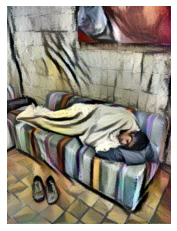

In [11]:
import matplotlib.pyplot as plt
img=plt.imread('/content/neural-style/o1.jpg')
plt.axis(False)
plt.imshow(img)

In [12]:
# CF
!find ./  -iname "*py" |xargs grep -ni "stylize"

./stylize.py:33:def stylize(network, initial, initial_noiseblend, content, styles, preserve_colors, iterations,
./stylize.py:38:    Stylize images.
./stylize.py:94:    # make stylized image using backpropogation
./stylize.py:213:                        # 1. Convert stylized RGB->grayscale accoriding to Rec.601 luma (0.299, 0.587, 0.114)
./stylize.py:214:                        # 2. Convert stylized grayscale into YUV (YCbCr)
./stylize.py:216:                        # 4. Recombine (stylizedYUV.Y, originalYUV.U, originalYUV.V)
./neural_style.py:13:from stylize import stylize
./neural_style.py:216:    for iteration, image, loss_vals in stylize(
./neural-style/stylize.py:33:def stylize(network, initial, initial_noiseblend, content, styles, preserve_colors, iterations,
./neural-style/stylize.py:38:    Stylize images.
./neural-style/stylize.py:94:    # make stylized image using backpropogation
./neural-style/stylize.py:213:                        # 1. Convert stylized RGB->grayscale accoridi